# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np

df = pd.read_csv('../data/raw/df.csv')
df

,Unnamed: 0,id_vivienda,folio,id_persona,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,0,1000901,100090101,1,16,2,4,3,3,72,2,1,1,1,6,1,1,3,1,199884
1,1,1000901,100090101,2,16,2,4,3,3,67,1,1,1,1,1,1,1,1,1,199884
2,2,1000901,100090101,3,16,2,4,3,3,40,2,5,1,8,1,1,1,1,1,199884
3,3,1000902,100090201,1,16,2,4,4,4,56,1,2,4,-88,6,1,1,3,1,67048
4,4,1000902,100090201,2,16,2,4,4,4,25,2,8,1,5,1,1,1,3,1,67048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202226,202226,4585804,458580401,2,9,1,3,3,3,8,1,,,1,,1,1,,1,1283333
202227,202227,4585804,458580401,3,9,1,3,3,3,46,1,1,1,11,1,2,1,1,1,1283333
202228,202228,4585807,458580701,1,9,1,3,3,3,31,2,2,1,8,1,1,1,3,1,500000
202229,202229,4585807,458580701,2,9,1,3,3,3,5,2,,,0,,2,1,,1,500000


In [2]:
# nueva columna id para identificador único por persona (según instrucciones de Casen 2022)
df['id'] = df['folio'].astype(str) + df['id_persona'].astype(str)

# Reordenar las columnas colocando 'id' al inicio
cols = ['id'] + [col for col in df.columns if col != 'id']
df = df[cols]

df.head()

,id,Unnamed: 0,id_vivienda,folio,id_persona,region,area,n_soceco,per_x_viv,per_x_hog,...,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,1000901011,0,1000901,100090101,1,16,2,4,3,3,...,2,1,1,1,6,1,1,3,1,199884
1,1000901012,1,1000901,100090101,2,16,2,4,3,3,...,1,1,1,1,1,1,1,1,1,199884
2,1000901013,2,1000901,100090101,3,16,2,4,3,3,...,2,5,1,8,1,1,1,1,1,199884
3,1000902011,3,1000902,100090201,1,16,2,4,4,4,...,1,2,4,-88,6,1,1,3,1,67048
4,1000902012,4,1000902,100090201,2,16,2,4,4,4,...,2,8,1,5,1,1,1,3,1,67048


In [3]:
#borrar columnas evidentemente innecesarias
df.drop(['Unnamed: 0', 'id_vivienda', 'folio', 'id_persona'], axis=1, inplace=True)
df.head()

/tmp/ipykernel_1691/2754966589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Unnamed: 0', 'id_vivienda', 'folio', 'id_persona'], axis=1, inplace=True)


,id,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,1000901011,16,2,4,3,3,72,2,1,1,1,6,1,1,3,1,199884
1,1000901012,16,2,4,3,3,67,1,1,1,1,1,1,1,1,1,199884
2,1000901013,16,2,4,3,3,40,2,5,1,8,1,1,1,1,1,199884
3,1000902011,16,2,4,4,4,56,1,2,4,-88,6,1,1,3,1,67048
4,1000902012,16,2,4,4,4,25,2,8,1,5,1,1,1,3,1,67048


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202231 entries, 0 to 202230
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            202231 non-null  object
 1   region        202231 non-null  int64 
 2   area          202231 non-null  int64 
 3   n_soceco      202231 non-null  int64 
 4   per_x_viv     202231 non-null  int64 
 5   per_x_hog     202231 non-null  int64 
 6   edad          202231 non-null  int64 
 7   sexo          202231 non-null  int64 
 8   ecivil        202231 non-null  object
 9   analf         202231 non-null  object
 10  educ          202231 non-null  int64 
 11  afil_sisprev  202231 non-null  object
 12  sprev_salud   202231 non-null  int64 
 13  nacionalidad  202231 non-null  int64 
 14  activ         202231 non-null  object
 15  ten_viv       202231 non-null  int64 
 16  ypch          202231 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 26.2+ MB


Todas deben ser numéricas, ya que representan códigos con valores que se le asignarán una vez hecho el diccionario correspondiente.

In [5]:
# identificar columnas object y convertirlas a entero
columnas_objeto = df.select_dtypes(include=['object']).columns.tolist()
print(columnas_objeto)

def convertir_a_entero(df, columnas_objeto):
    for columna in columnas_objeto:
        try:
            df[columna] = pd.to_numeric(df[columna], errors='coerce').astype('Int64')
        except ValueError:
            print(f"No se pudo convertir la columna {columna} a entero. Verifica los datos.")

convertir_a_entero(df, columnas_objeto)

/tmp/ipykernel_1691/2920209376.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = pd.to_numeric(df[columna], errors='coerce').astype('Int64')


['id', 'ecivil', 'analf', 'afil_sisprev', 'activ']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202231 entries, 0 to 202230
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            202231 non-null  Int64
 1   region        202231 non-null  int64
 2   area          202231 non-null  int64
 3   n_soceco      202231 non-null  int64
 4   per_x_viv     202231 non-null  int64
 5   per_x_hog     202231 non-null  int64
 6   edad          202231 non-null  int64
 7   sexo          202231 non-null  int64
 8   ecivil        169151 non-null  Int64
 9   analf         166393 non-null  Int64
 10  educ          202231 non-null  int64
 11  afil_sisprev  110734 non-null  Int64
 12  sprev_salud   202231 non-null  int64
 13  nacionalidad  202231 non-null  int64
 14  activ         166393 non-null  Int64
 15  ten_viv       202231 non-null  int64
 16  ypch          202231 non-null  int64
dtypes: Int64(5), int64(12)
memory usage: 27.2 MB


In [7]:
df.head()

,id,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,1000901011,16,2,4,3,3,72,2,1,1,1,6,1,1,3,1,199884
1,1000901012,16,2,4,3,3,67,1,1,1,1,1,1,1,1,1,199884
2,1000901013,16,2,4,3,3,40,2,5,1,8,1,1,1,1,1,199884
3,1000902011,16,2,4,4,4,56,1,2,4,-88,6,1,1,3,1,67048
4,1000902012,16,2,4,4,4,25,2,8,1,5,1,1,1,3,1,67048


In [8]:
excel_file = pd.ExcelFile('../data/raw/diccionarios.xlsx')
excel_file

In [9]:
# diccionario principal para almacenar los datos de cada pestaña
diccionarios_completos = {}

# iterar sobre cada pestaña
pestañas_a_procesar = ['region','activ','n_soceco', 'area', 'sexo', 'ecivil', 'analf', 'educ', 'afil_sisprev', 'sprev_salud', 'nacionalidad', 'ten_viv']
for sheet_name in excel_file.sheet_names:
    if sheet_name in pestañas_a_procesar:
        # Leer la pestaña actual
        df_excel = excel_file.parse(sheet_name)

        # nombres de las columnas a buscar
        columnas_a_buscar = ['cod_region', 'region','cod_activ', 'activ', 'cod_n_soceco', 'n_soceco', 'cod_area', 'area', 'cod_sexo', 'sexo', 'cod_ecivil', 'ecivil', 'cod_analf', 'analf', 'cod_educ', 'educ', 'cod_afil_sisprev', 'afil_sisprev', 'cod_sprev_salud', 'sprev_salud', 'cod_nacion', 'nacionalidad', 'cod_ten_viv', 'ten_viv']

        # Encontrar las columnas existentes en la pestaña
        columnas_existentes = [col for col in df_excel.columns if col in columnas_a_buscar]

        # Crear el diccionario para la pestaña actual
        diccionario = df_excel[columnas_existentes].to_dict('list')
        diccionario_pestaña = {diccionario[columnas_existentes[0]][i]: diccionario[columnas_existentes[1]][i] for i in range(len(diccionario[columnas_existentes[0]]))}

        # Agregar el diccionario de la pestaña al diccionario principal
        diccionarios_completos[sheet_name] = diccionario_pestaña

diccionarios_completos

{'region': {1: 'Región de Tarapacá',
  2: 'Región de Antofagasta',
  3: 'Región de Atacama',
  4: 'Región de Coquimbo',
  5: 'Región de Valparaíso',
  6: "Región del Libertador Gral. Bernardo O'Higgins",
  7: 'Región del Maule',
  8: 'Región del Biobío',
  9: 'Región de La Araucanía',
  10: 'Región de Los Lagos',
  11: 'Región de Aysén del Gral. Carlos Ibáñez del Campo',
  12: 'Región de Magallanes y de la Antártica Chilena',
  13: 'Región Metropolitana de Santiago',
  14: 'Región de Los Ríos',
  15: 'Región de Arica y Parinacota',
  16: 'Región de Ñuble'},
 'activ': {1: 'Ocupados', 2: 'Desocupados', 3: 'Inactivos'},
 'n_soceco': {1: 'Bajo',
  2: 'Medio',
  3: 'Alto',
  4: 'Bajo-medio',
  5: 'Bajo-alto',
  6: 'Bajo-medio-alto',
  7: 'Medio-alto'},
 'area': {1: 'Urbano', 2: 'Rural'},
 'sexo': {1: 'Hombre', 2: 'Mujer'},
 'ecivil': {1: 'Casado(a)',
  2: 'Conviviente sin acuerdo de unión civil',
  3: 'Conviviente civil ',
  4: 'Anulado(a)',
  5: 'Separado(a)',
  6: 'Divorciado(a)',
  7: 'V

Ahora se deben aplicar los valores del diccionario al Dataframe, para poder analizar la información.

In [10]:
def aplicar_mapeos_vectorizado(df, mapeos):
    def mapper(value, column_mapeo):
        if column_mapeo is None:
            return value  # Devolver valor original si no hay mapeo para la columna
        if isinstance(column_mapeo, dict):
            return column_mapeo.get(value, value)  # Devolver valor original si no hay mapeo para el valor
        else:
            return value  # Devolver valor original si column_mapeo no es un diccionario

    df_mapeado = df.copy()
    for columna, serie in df.items():
        if columna in mapeos:
            df_mapeado[columna] = serie.map(lambda x: mapper(x, mapeos[columna]))
        else:
            df_mapeado[columna] = serie  # Mantener la columna sin cambios si no hay mapeo
    return df_mapeado

In [11]:
df_mapeado = aplicar_mapeos_vectorizado(df, diccionarios_completos)
df_mapeado

,id,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,1000901011,Región de Ñuble,Rural,Bajo-medio,3,3,72,Mujer,Casado(a),Lee y escribe,Básica incompleta,No cotiza,FONASA,Chile,Inactivos,Propia,199884
1,1000901012,Región de Ñuble,Rural,Bajo-medio,3,3,67,Hombre,Casado(a),Lee y escribe,Básica incompleta,AFP,FONASA,Chile,Ocupados,Propia,199884
2,1000901013,Región de Ñuble,Rural,Bajo-medio,3,3,40,Mujer,Separado(a),Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Ocupados,Propia,199884
3,1000902011,Región de Ñuble,Rural,Bajo-medio,4,4,56,Hombre,Conviviente sin acuerdo de unión civil,No lee ni escribe,np.nan,No cotiza,FONASA,Chile,Inactivos,Propia,67048
4,1000902012,Región de Ñuble,Rural,Bajo-medio,4,4,25,Mujer,Soltero(a),Lee y escribe,Media humanista completa,AFP,FONASA,Chile,Inactivos,Propia,67048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202226,4585804012,Región de La Araucanía,Urbano,Alto,3,3,8,Hombre,NaN,NaN,Básica incompleta,NaN,FONASA,Chile,NaN,Propia,1283333
202227,4585804013,Región de La Araucanía,Urbano,Alto,3,3,46,Hombre,Casado(a),Lee y escribe,Profesional completo,AFP,Isapre,Chile,Ocupados,Propia,1283333
202228,4585807011,Región de La Araucanía,Urbano,Alto,3,3,31,Mujer,Conviviente sin acuerdo de unión civil,Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Inactivos,Propia,500000
202229,4585807012,Región de La Araucanía,Urbano,Alto,3,3,5,Mujer,NaN,NaN,Sin educación formal,NaN,Isapre,Chile,NaN,Propia,500000


In [12]:
df_mapeado.to_csv('../data/raw/df_mapeado.csv')

**EDA**

**1. Información del dataset**

In [13]:
df_mapeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202231 entries, 0 to 202230
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            202231 non-null  Int64 
 1   region        202231 non-null  object
 2   area          202231 non-null  object
 3   n_soceco      202231 non-null  object
 4   per_x_viv     202231 non-null  int64 
 5   per_x_hog     202231 non-null  int64 
 6   edad          202231 non-null  int64 
 7   sexo          202231 non-null  object
 8   ecivil        169151 non-null  object
 9   analf         166393 non-null  object
 10  educ          202231 non-null  object
 11  afil_sisprev  110734 non-null  object
 12  sprev_salud   202231 non-null  object
 13  nacionalidad  202231 non-null  object
 14  activ         166393 non-null  object
 15  ten_viv       202231 non-null  object
 16  ypch          202231 non-null  int64 
dtypes: Int64(1), int64(4), object(12)
memory usage: 26.4+ MB


In [14]:
df_mapeado.shape

(202231, 17)

In [15]:
df_mapeado['id'].duplicated().sum()

np.int64(0)

In [16]:
df_mapeado.duplicated().sum()

np.int64(0)

In [17]:
categoricas = df_mapeado.select_dtypes(include=['object']).columns.tolist()

for col in categoricas:
    print(f'columna {col}: {df_mapeado[col].nunique()} niveles')

columna region: 16 niveles
columna area: 2 niveles
columna n_soceco: 7 niveles
columna sexo: 2 niveles
columna ecivil: 8 niveles
columna analf: 4 niveles
columna educ: 14 niveles
columna afil_sisprev: 7 niveles
columna sprev_salud: 6 niveles
columna nacionalidad: 3 niveles
columna activ: 3 niveles
columna ten_viv: 4 niveles


In [18]:
df_mapeado

,id,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,1000901011,Región de Ñuble,Rural,Bajo-medio,3,3,72,Mujer,Casado(a),Lee y escribe,Básica incompleta,No cotiza,FONASA,Chile,Inactivos,Propia,199884
1,1000901012,Región de Ñuble,Rural,Bajo-medio,3,3,67,Hombre,Casado(a),Lee y escribe,Básica incompleta,AFP,FONASA,Chile,Ocupados,Propia,199884
2,1000901013,Región de Ñuble,Rural,Bajo-medio,3,3,40,Mujer,Separado(a),Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Ocupados,Propia,199884
3,1000902011,Región de Ñuble,Rural,Bajo-medio,4,4,56,Hombre,Conviviente sin acuerdo de unión civil,No lee ni escribe,np.nan,No cotiza,FONASA,Chile,Inactivos,Propia,67048
4,1000902012,Región de Ñuble,Rural,Bajo-medio,4,4,25,Mujer,Soltero(a),Lee y escribe,Media humanista completa,AFP,FONASA,Chile,Inactivos,Propia,67048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202226,4585804012,Región de La Araucanía,Urbano,Alto,3,3,8,Hombre,NaN,NaN,Básica incompleta,NaN,FONASA,Chile,NaN,Propia,1283333
202227,4585804013,Región de La Araucanía,Urbano,Alto,3,3,46,Hombre,Casado(a),Lee y escribe,Profesional completo,AFP,Isapre,Chile,Ocupados,Propia,1283333
202228,4585807011,Región de La Araucanía,Urbano,Alto,3,3,31,Mujer,Conviviente sin acuerdo de unión civil,Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Inactivos,Propia,500000
202229,4585807012,Región de La Araucanía,Urbano,Alto,3,3,5,Mujer,NaN,NaN,Sin educación formal,NaN,Isapre,Chile,NaN,Propia,500000


In [19]:
df_mapeado.drop(['id'], axis=1, inplace=True)
df_mapeado.head()

,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,Región de Ñuble,Rural,Bajo-medio,3,3,72,Mujer,Casado(a),Lee y escribe,Básica incompleta,No cotiza,FONASA,Chile,Inactivos,Propia,199884
1,Región de Ñuble,Rural,Bajo-medio,3,3,67,Hombre,Casado(a),Lee y escribe,Básica incompleta,AFP,FONASA,Chile,Ocupados,Propia,199884
2,Región de Ñuble,Rural,Bajo-medio,3,3,40,Mujer,Separado(a),Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Ocupados,Propia,199884
3,Región de Ñuble,Rural,Bajo-medio,4,4,56,Hombre,Conviviente sin acuerdo de unión civil,No lee ni escribe,np.nan,No cotiza,FONASA,Chile,Inactivos,Propia,67048
4,Región de Ñuble,Rural,Bajo-medio,4,4,25,Mujer,Soltero(a),Lee y escribe,Media humanista completa,AFP,FONASA,Chile,Inactivos,Propia,67048


In [20]:
df_mapeado['educ'].unique()

array(['Básica incompleta', 'Técnico nivel superior completo', 'np.nan',
       'Media humanista completa', 'Sin educación formal',
       'Media humanista incompleta', 'Básica completa',
       'Media técnica profesional incompleta',
       'Técnico nivel superior incompleta',
       'Media técnica profesional completa', 'Profesional completo',
       'Profesional incompleto', 'Posgrado completo',
       'Posgrado incompleto'], dtype=object)

In [21]:
df_mapeado = df_mapeado.replace({'np.nan': np.nan})
df_mapeado.head()

,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,Región de Ñuble,Rural,Bajo-medio,3,3,72,Mujer,Casado(a),Lee y escribe,Básica incompleta,No cotiza,FONASA,Chile,Inactivos,Propia,199884
1,Región de Ñuble,Rural,Bajo-medio,3,3,67,Hombre,Casado(a),Lee y escribe,Básica incompleta,AFP,FONASA,Chile,Ocupados,Propia,199884
2,Región de Ñuble,Rural,Bajo-medio,3,3,40,Mujer,Separado(a),Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Ocupados,Propia,199884
3,Región de Ñuble,Rural,Bajo-medio,4,4,56,Hombre,Conviviente sin acuerdo de unión civil,No lee ni escribe,NaN,No cotiza,FONASA,Chile,Inactivos,Propia,67048
4,Región de Ñuble,Rural,Bajo-medio,4,4,25,Mujer,Soltero(a),Lee y escribe,Media humanista completa,AFP,FONASA,Chile,Inactivos,Propia,67048




**2. Análisis univariante**

**2.1 Categóricas**

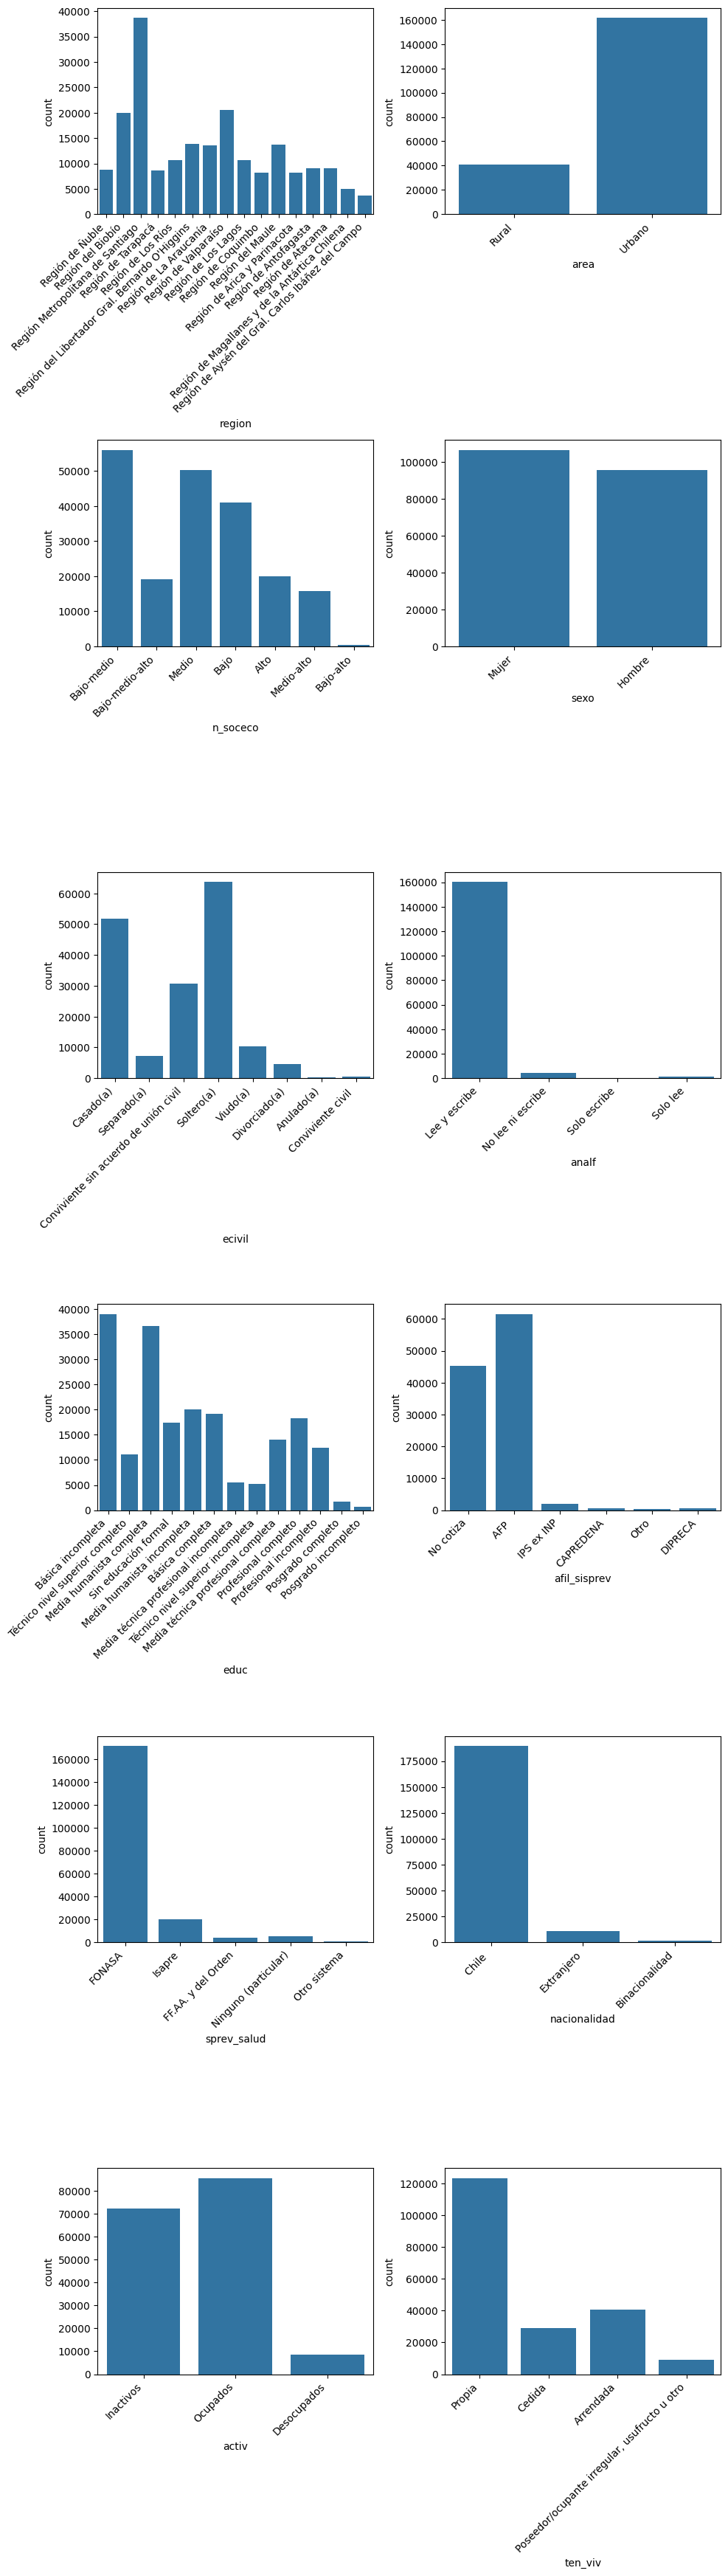

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(6, 2, figsize = (10, 35))

for i, cat in enumerate(categoricas):
    row, col = i // 2, i % 2
    sns.countplot(ax=axis[row,col], data=df_mapeado[categoricas], x=cat)
    plt.setp(axis[row, col].get_xticklabels(), rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

- **region**: mayoría de las personas se concentran en las regiones RM, Biobio y Valparaíso

- **area**: mayoría zona urbana

- **n_soceco**: mayoría entre bajo, bajo-medio, medio

- **sexo**: cantidad similar entre hombres y mujeres

- **ecivil**: mayoría soltero, casado o conviviente sin unión civil

- **analf**: mayoría lee y escribe

- **educ**: mayoría enseñanza básica incompleta o enseñanza media completa

- **afil_sisprev**: Mayoría en AFP seguido de gente que no cotiza

- **sisprev_salud**: Mayoría en Fonasa

- **nacionalidad**: mayoría nacionalidad chilena

- **activ**: mayoría ocupados, pero muchos inactivos (sin trabajo y no busca)

- **ten_viv**: mayoría con casa propia


**2.2 Numéricas**

In [23]:
numericas = df_mapeado.select_dtypes(include=['int']).columns.tolist()
numericas

['per_x_viv', 'per_x_hog', 'edad', 'ypch']

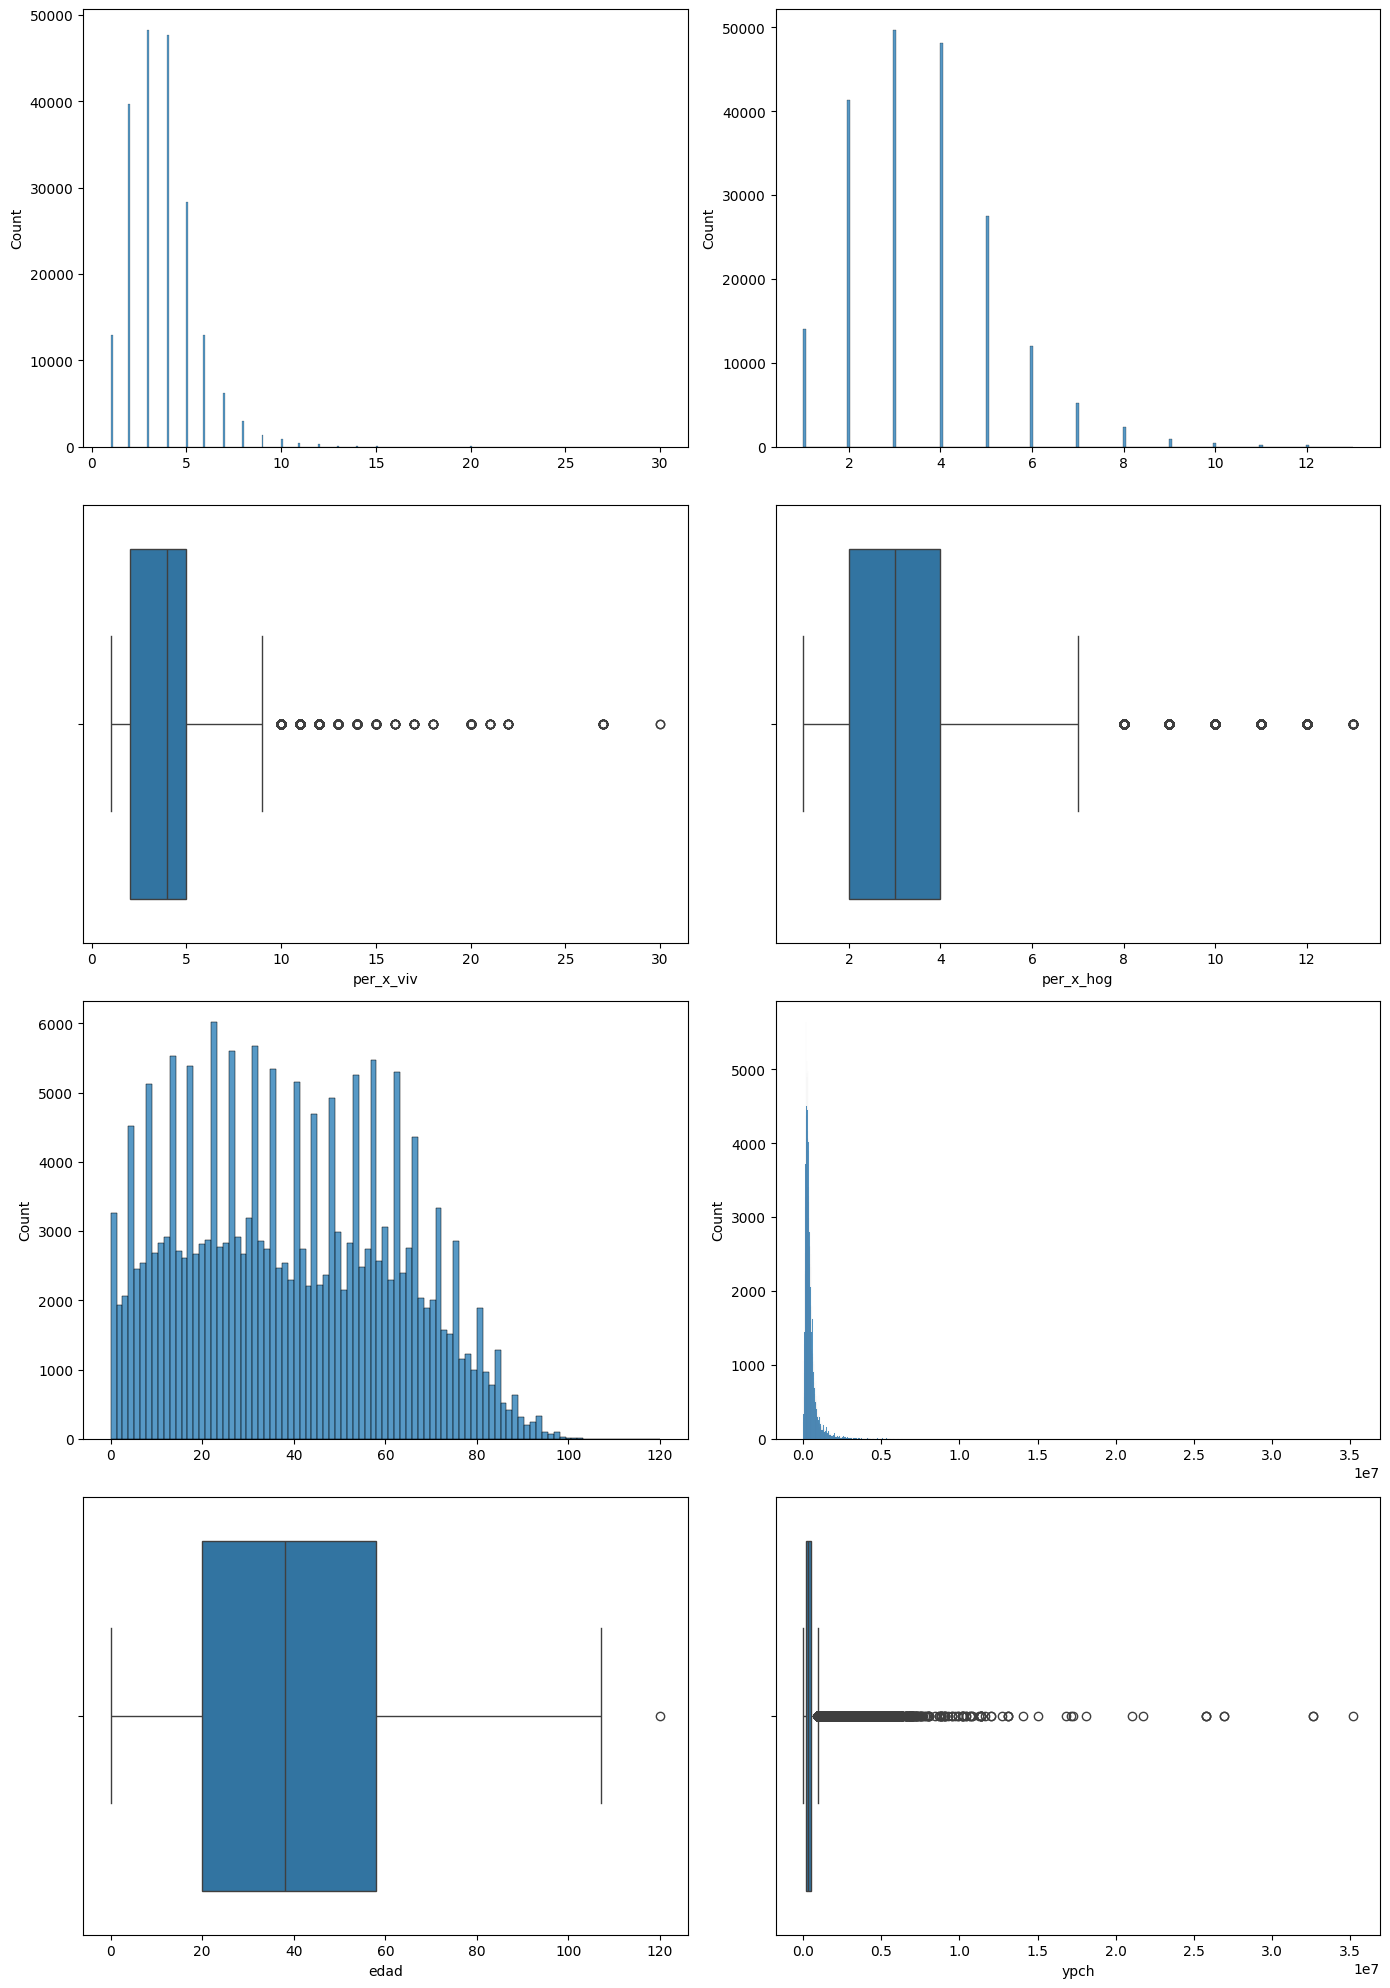

In [24]:
fig, axis = plt.subplots(4, 2 , figsize=(14, 20))

for i, num in enumerate(numericas):
    if i % 2 == 0 :
        sns.histplot(ax = axis[i, 0], data = df_mapeado, x = num).set(xlabel=None)
        sns.boxplot(ax = axis[i + 1, 0 ], data = df_mapeado, x = num)
    else :
        sns.histplot(ax=axis[i - 1, 1], data = df_mapeado, x = num).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data = df_mapeado, x = num)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- **per_x_viv**: las personas por vivienda se concentran entre 2 a 5, y se presentan outliers aprox desde las 10 a las 30 personas

- **per_x_hog**: es una variable similar a las personas por vivienda, y se concentra entre 2 a 4. Al ser una variable similar a personas por vivienda, sería prudente elegir una, probablemente per_x_hog ya que aparentemente presenta menos outliers.

- **edad**: las edades se concentran en torno a los 20-60 años. Se debe revisar, ya que hay un registro de 120 años, lo cual es poco probable y se deba eliminar o imputar. También se debe determinar desde que edad hasta cual se considerará para este análisis.

- **ypch**: esta corresponde a la variable objetivo, es el ingreso percapita por hogar. Presenta gran cantidad de outliers. 

**3. Análisis de correlación**

In [25]:
df_mapeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202231 entries, 0 to 202230
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        202231 non-null  object
 1   area          202231 non-null  object
 2   n_soceco      202231 non-null  object
 3   per_x_viv     202231 non-null  int64 
 4   per_x_hog     202231 non-null  int64 
 5   edad          202231 non-null  int64 
 6   sexo          202231 non-null  object
 7   ecivil        169151 non-null  object
 8   analf         166393 non-null  object
 9   educ          201089 non-null  object
 10  afil_sisprev  110253 non-null  object
 11  sprev_salud   200592 non-null  object
 12  nacionalidad  202231 non-null  object
 13  activ         166393 non-null  object
 14  ten_viv       202231 non-null  object
 15  ypch          202231 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 24.7+ MB


In [26]:
# Factorización y creación de diccionario

df_corr = df_mapeado.copy()
encoding_dict = {}

# Recorrer cada columna categórica y convertirla en valores numéricos
for col in categoricas:
    # Usar pd.factorize solo en los valores no nulos
    df_corr.loc[df_corr[col].notnull(), col], uniques = pd.factorize(df_corr[col].dropna())
    
    # Guardar la codificación en el diccionario
    encoding_dict[col] = {index: value for index, value in enumerate(uniques)}

df_corr

,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,0,0,0,3,3,72,0,0,0,0,0,0,0,0,0,199884
1,0,0,0,3,3,67,1,0,0,0,1,0,0,1,0,199884
2,0,0,0,3,3,40,0,1,0,1,1,0,0,1,0,199884
3,0,0,0,4,4,56,1,2,1,NaN,0,0,0,0,0,67048
4,0,0,0,4,4,25,0,3,0,2,1,0,0,0,0,67048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202226,6,1,4,3,3,8,1,NaN,NaN,0,NaN,0,0,NaN,0,1283333
202227,6,1,4,3,3,46,1,0,0,9,1,1,0,1,0,1283333
202228,6,1,4,3,3,31,0,2,0,1,1,0,0,0,0,500000
202229,6,1,4,3,3,5,0,NaN,NaN,3,NaN,1,0,NaN,0,500000


In [27]:
encoding_dict

{'region': {0: 'Región de Ñuble',
  1: 'Región del Biobío',
  2: 'Región Metropolitana de Santiago',
  3: 'Región de Tarapacá',
  4: 'Región de Los Ríos',
  5: "Región del Libertador Gral. Bernardo O'Higgins",
  6: 'Región de La Araucanía',
  7: 'Región de Valparaíso',
  8: 'Región de Los Lagos',
  9: 'Región de Coquimbo',
  10: 'Región del Maule',
  11: 'Región de Arica y Parinacota',
  12: 'Región de Antofagasta',
  13: 'Región de Atacama',
  14: 'Región de Magallanes y de la Antártica Chilena',
  15: 'Región de Aysén del Gral. Carlos Ibáñez del Campo'},
 'area': {0: 'Rural', 1: 'Urbano'},
 'n_soceco': {0: 'Bajo-medio',
  1: 'Bajo-medio-alto',
  2: 'Medio',
  3: 'Bajo',
  4: 'Alto',
  5: 'Medio-alto',
  6: 'Bajo-alto'},
 'sexo': {0: 'Mujer', 1: 'Hombre'},
 'ecivil': {0: 'Casado(a)',
  1: 'Separado(a)',
  2: 'Conviviente sin acuerdo de unión civil',
  3: 'Soltero(a)',
  4: 'Viudo(a)',
  5: 'Divorciado(a)',
  6: 'Anulado(a)',
  7: 'Conviviente civil '},
 'analf': {0: 'Lee y escribe',
 

In [28]:
df_corr['activ'].unique()

array([0, 1, nan, 2], dtype=object)

In [29]:
df_corr.to_csv('../data/interim/df_corr.csv')

<Axes: >

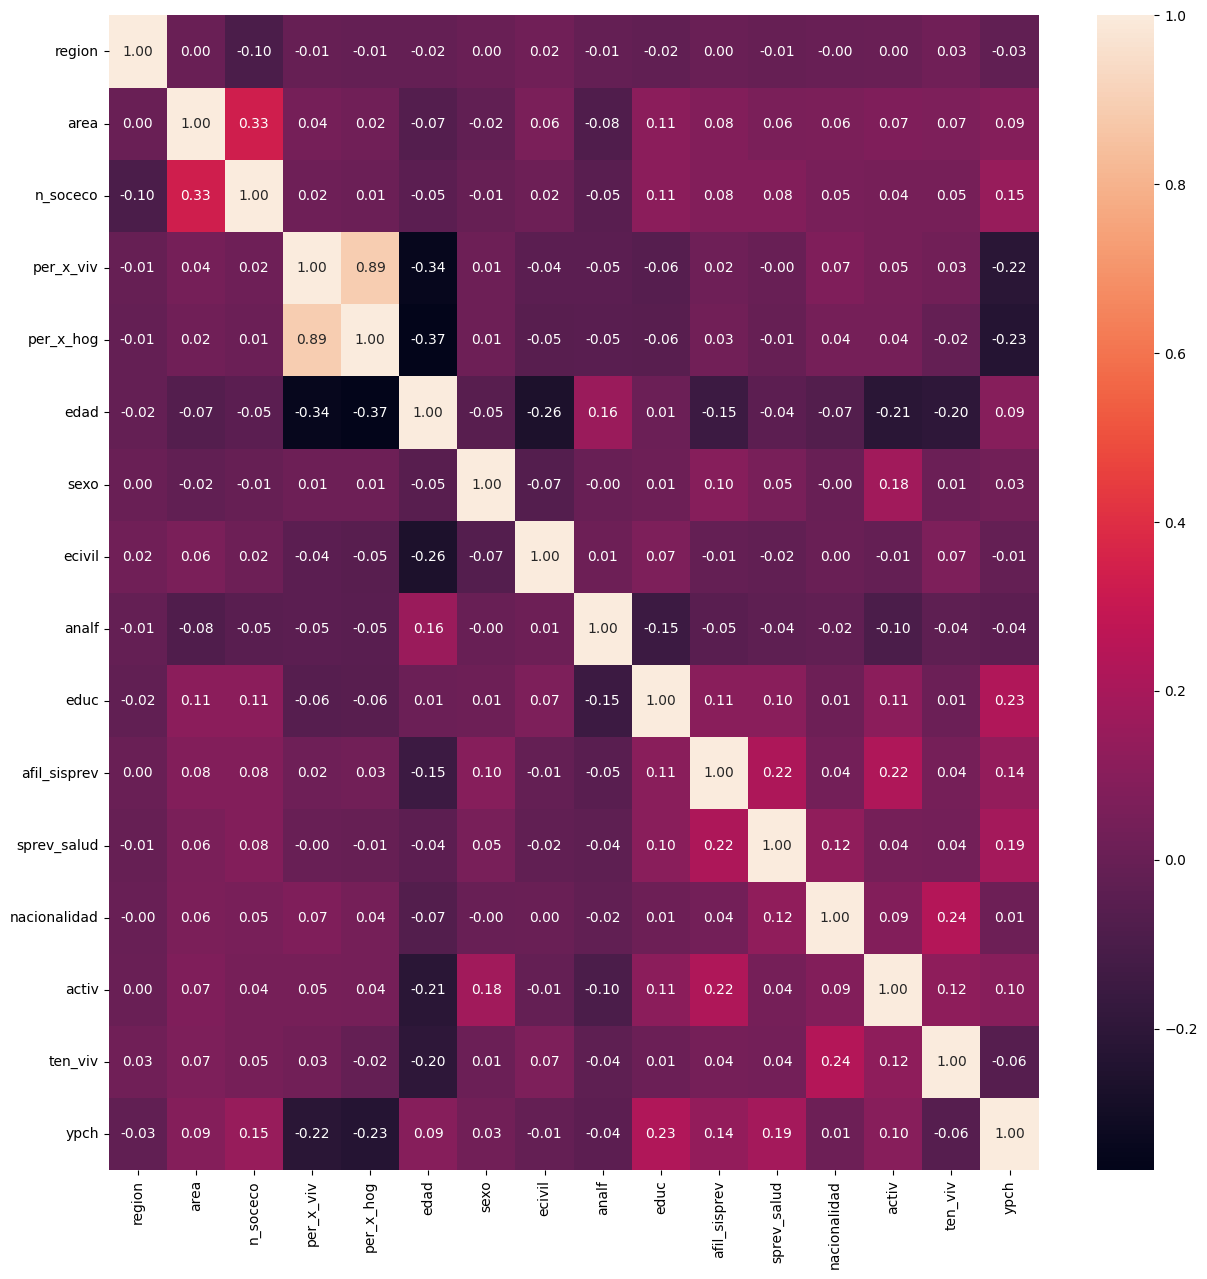

In [30]:
fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(df_corr.corr(), annot = True, fmt = ".2f")

**4. INGENIERÍA DE CARACTERÍSTICAS**

**Outliers**

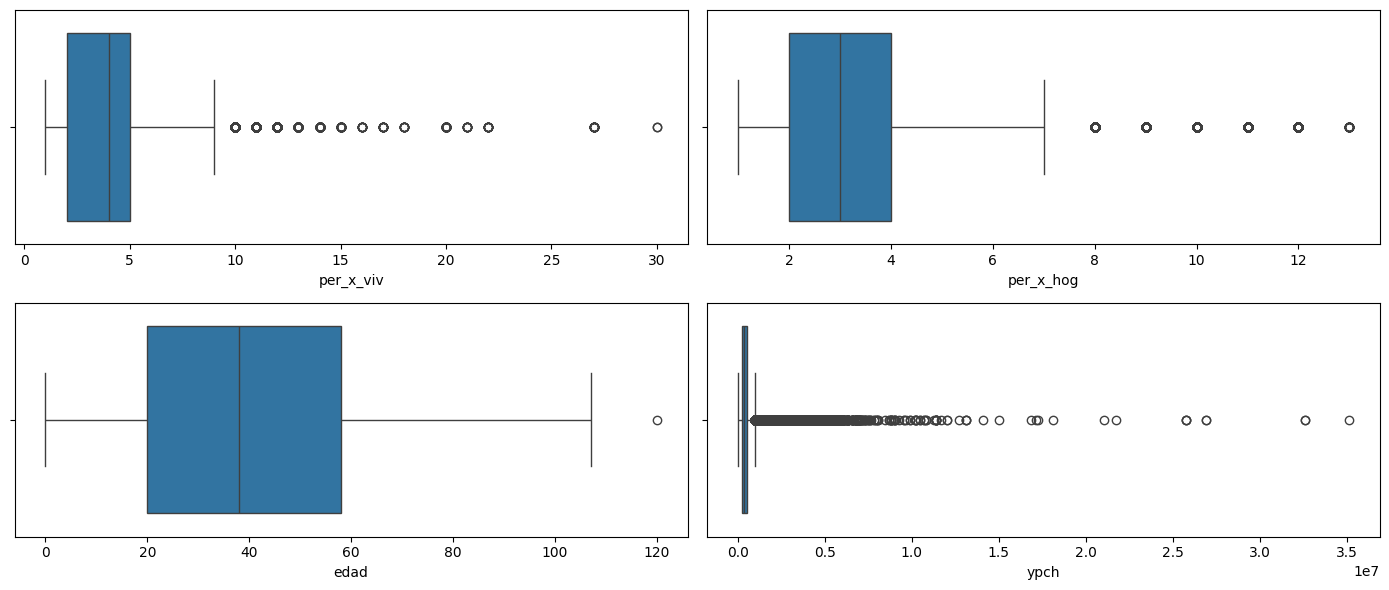

In [31]:
fig, axis = plt.subplots(2, 2, figsize = (14, 6))

for i, num in enumerate(numericas):
    row, col = i // 2, i % 2
    sns.boxplot(ax=axis[row,col], data=df_corr[numericas], x=num)

plt.tight_layout()
plt.show()

In [32]:
df_corr[numericas].describe()

,per_x_viv,per_x_hog,edad,ypch
count,202231.000000,202231.000000,202231.000000,2.022310e+05
mean,3.702850,3.571366,39.322923,4.548579e+05
std,1.793857,1.621015,23.030135,5.241757e+05
min,1.000000,1.000000,0.000000,0.000000e+00
25%,2.000000,2.000000,20.000000,2.159080e+05
50%,4.000000,3.000000,38.000000,3.303330e+05
75%,5.000000,4.000000,58.000000,5.181460e+05
max,30.000000,13.000000,120.000000,3.514333e+07


In [33]:
def analisis_ric(columna, df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'{columna}   lim_inferior: {lim_inf}, lim_superior: {lim_sup}')

In [34]:
analisis_ric('edad',df_corr)

edad   lim_inferior: -37.0, lim_superior: 115.0


Respecto a la edad, se debe hacer un filtro importante, ya que la finalidad de la aplicación será predecir los ingresos de una persona. Para el presente análisis, se considerará a la población que va desde los 15 a los 100 años de edad, lo cual parece un rango razonable en cuánto a una relativa autonomía financiera.

In [35]:
((df_corr['edad']>100)|(df_corr['edad']<15)).sum()

np.int64(35863)

In [36]:
print(f'df sin eliminar registros de edad: {df_corr.shape}')
df_corr = df_corr[df_corr['edad']<= 100]
print(f'df con registros eliminados de edad: {df_corr.shape}')

df sin eliminar registros de edad: (202231, 16)
df con registros eliminados de edad: (202206, 16)


In [37]:
print(f'df sin eliminar registros de edad: {df_corr.shape}')
df_corr = df_corr[df_corr['edad']>= 15]
print(f'df con registros eliminados de edad: {df_corr.shape}')

df sin eliminar registros de edad: (202206, 16)
df con registros eliminados de edad: (166368, 16)


Se eliminaron 35.863 registros, ya que no cumplen con la población objetivo sobre la cual se harán predicciones de ingreso económico desde nuestra aplicación (15 a 100 años). 

In [38]:
df_corr[numericas].describe()

,per_x_viv,per_x_hog,edad,ypch
count,166368.000000,166368.000000,166368.000000,1.663680e+05
mean,3.512959,3.386703,46.128907,4.769200e+05
std,1.757535,1.591054,19.451768,5.453249e+05
min,1.000000,1.000000,15.000000,0.000000e+00
25%,2.000000,2.000000,29.000000,2.300000e+05
50%,3.000000,3.000000,45.000000,3.500000e+05
75%,4.000000,4.000000,61.000000,5.435620e+05
max,30.000000,13.000000,100.000000,3.514333e+07


In [39]:
analisis_ric('ypch', df_corr)

ypch   lim_inferior: -240343.0, lim_superior: 1013905.0


In [40]:
(df_corr['ypch']>7000000).sum()

np.int64(82)

In [41]:
print(f'df sin eliminar registros de ypch: {df_corr.shape}')
df_corr = df_corr[df_corr['ypch']<= 7000000]
print(f'df con registros eliminados de ypch: {df_corr.shape}')

df sin eliminar registros de ypch: (166368, 16)
df con registros eliminados de ypch: (166286, 16)


In [42]:
df_corr['ypch'].describe()

count    1.662860e+05
mean     4.713561e+05
std      4.640048e+05
min      0.000000e+00
25%      2.299170e+05
50%      3.500000e+05
75%      5.430560e+05
max      6.991246e+06
Name: ypch, dtype: float64

Se debe elegir entre per_x_viv o per_x_hog, ya que ambas se correlacionan fuertemente entre sí(89%), y se correlacionan de manera similar con la variable objetivo. De no eliminarse, podrían surgir problemas de colinealidad, y con ello, sobreajuste del modelo

In [43]:
df_corr.drop(['per_x_viv'], axis=1, inplace=True)
df_corr

,region,area,n_soceco,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,0,0,0,3,72,0,0,0,0,0,0,0,0,0,199884
1,0,0,0,3,67,1,0,0,0,1,0,0,1,0,199884
2,0,0,0,3,40,0,1,0,1,1,0,0,1,0,199884
3,0,0,0,4,56,1,2,1,NaN,0,0,0,0,0,67048
4,0,0,0,4,25,0,3,0,2,1,0,0,0,0,67048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202222,6,1,4,3,47,0,3,0,9,1,0,0,1,0,520722
202225,6,1,4,3,41,0,0,0,9,1,0,0,1,0,1283333
202227,6,1,4,3,46,1,0,0,9,1,1,0,1,0,1283333
202228,6,1,4,3,31,0,2,0,1,1,0,0,0,0,500000


**Valores nulos**

In [44]:
df_corr.isnull().sum().sort_values(ascending=False)

afil_sisprev    56108
sprev_salud      1432
educ             1133
per_x_hog           0
region              0
area                0
n_soceco            0
ecivil              0
sexo                0
edad                0
analf               0
nacionalidad        0
activ               0
ten_viv             0
ypch                0
dtype: int64

In [45]:
df_corr["afil_sisprev"].fillna(df_corr["afil_sisprev"].mode()[0], inplace = True)
df_corr

/tmp/ipykernel_1691/3559841532.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corr["afil_sisprev"].fillna(df_corr["afil_sisprev"].mode()[0], inplace = True)
/tmp/ipykernel_1691/3559841532.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_corr["afil_sisprev"].fillna(df_corr["afil_sisprev"].mode()[0]

,region,area,n_soceco,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,0,0,0,3,72,0,0,0,0,0,0,0,0,0,199884
1,0,0,0,3,67,1,0,0,0,1,0,0,1,0,199884
2,0,0,0,3,40,0,1,0,1,1,0,0,1,0,199884
3,0,0,0,4,56,1,2,1,NaN,0,0,0,0,0,67048
4,0,0,0,4,25,0,3,0,2,1,0,0,0,0,67048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202222,6,1,4,3,47,0,3,0,9,1,0,0,1,0,520722
202225,6,1,4,3,41,0,0,0,9,1,0,0,1,0,1283333
202227,6,1,4,3,46,1,0,0,9,1,1,0,1,0,1283333
202228,6,1,4,3,31,0,2,0,1,1,0,0,0,0,500000


In [46]:
df_corr.isnull().sum().sort_values(ascending=False)

sprev_salud     1432
educ            1133
region             0
per_x_hog          0
edad               0
area               0
n_soceco           0
ecivil             0
sexo               0
analf              0
afil_sisprev       0
nacionalidad       0
activ              0
ten_viv            0
ypch               0
dtype: int64

In [47]:
df_corr["sprev_salud"].fillna(df_corr["sprev_salud"].mode()[0], inplace = True)
df_corr.info()

/tmp/ipykernel_1691/3037009958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corr["sprev_salud"].fillna(df_corr["sprev_salud"].mode()[0], inplace = True)
/tmp/ipykernel_1691/3037009958.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_corr["sprev_salud"].fillna(df_corr["sprev_salud"].mode()[0], in

<class 'pandas.core.frame.DataFrame'>
Index: 166286 entries, 0 to 202230
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        166286 non-null  object
 1   area          166286 non-null  object
 2   n_soceco      166286 non-null  object
 3   per_x_hog     166286 non-null  int64 
 4   edad          166286 non-null  int64 
 5   sexo          166286 non-null  object
 6   ecivil        166286 non-null  object
 7   analf         166286 non-null  object
 8   educ          165153 non-null  object
 9   afil_sisprev  166286 non-null  int64 
 10  sprev_salud   166286 non-null  int64 
 11  nacionalidad  166286 non-null  object
 12  activ         166286 non-null  object
 13  ten_viv       166286 non-null  object
 14  ypch          166286 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 20.3+ MB


In [48]:
df_corr.isnull().sum().sort_values(ascending=False)

educ            1133
area               0
region             0
per_x_hog          0
edad               0
sexo               0
n_soceco           0
ecivil             0
analf              0
afil_sisprev       0
sprev_salud        0
nacionalidad       0
activ              0
ten_viv            0
ypch               0
dtype: int64

In [49]:
df_corr.dropna(inplace=True)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165153 entries, 0 to 202230
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        165153 non-null  object
 1   area          165153 non-null  object
 2   n_soceco      165153 non-null  object
 3   per_x_hog     165153 non-null  int64 
 4   edad          165153 non-null  int64 
 5   sexo          165153 non-null  object
 6   ecivil        165153 non-null  object
 7   analf         165153 non-null  object
 8   educ          165153 non-null  object
 9   afil_sisprev  165153 non-null  int64 
 10  sprev_salud   165153 non-null  int64 
 11  nacionalidad  165153 non-null  object
 12  activ         165153 non-null  object
 13  ten_viv       165153 non-null  object
 14  ypch          165153 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 20.2+ MB


In [50]:
df_clean = df_corr.copy()

In [51]:
df_clean.to_csv('../data/processed/df_clean.csv')

**5. MODELO**

In [52]:
from sklearn.model_selection import train_test_split

X = df_clean.drop("ypch", axis = 1)
y = df_clean["ypch"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,region,area,n_soceco,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv
43559,7,1,3,1,52,1,3,0,5,1,0,0,1,3
173350,2,1,2,5,66,0,0,0,5,0,0,0,0,0
125464,4,0,1,4,53,0,0,0,5,0,0,0,0,0
36596,0,0,3,3,72,1,0,0,0,0,0,0,0,0
150951,7,1,1,4,19,1,3,0,10,1,0,0,0,0


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = X.columns)
X_train_norm.to_csv('../data/processed/X_train_normalizados.csv', index=False)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = X.columns)
X_test_norm.to_csv('../data/processed/X_test_normalizados.csv', index=False)

X_train_norm.head()

,region,area,n_soceco,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv
43559,0.262393,0.507117,0.646026,-1.504539,0.309255,1.074652,0.713781,-0.171035,0.136723,0.415352,-0.352192,-0.247751,0.658466,2.538175
173350,-0.939333,0.507117,0.015230,1.015669,1.030453,-0.930534,-1.285700,-0.171035,0.136723,-1.369618,-0.352192,-0.247751,-1.062186,-0.689115
125464,-0.458643,-1.971933,-0.615566,0.385617,0.360769,-0.930534,-1.285700,-0.171035,0.136723,-1.369618,-0.352192,-0.247751,-1.062186,-0.689115
36596,-1.420024,-1.971933,0.646026,-0.244435,1.339537,1.074652,-1.285700,-0.171035,-1.352390,-1.369618,-0.352192,-0.247751,-1.062186,-0.689115
150951,0.262393,0.507117,-0.615566,0.385617,-1.390711,1.074652,0.713781,-0.171035,1.625837,0.415352,-0.352192,-0.247751,-1.062186,-0.689115


In [54]:
from sklearn.feature_selection import f_regression, SelectKBest

# Seleccionar las 5 mejores características según la varianza explicada
selection_model = SelectKBest(f_regression, k=7)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,area,n_soceco,per_x_hog,educ,afil_sisprev,sprev_salud,activ
0,1,3,1,5,1,0,1
1,1,2,5,5,0,0,0
2,0,1,4,5,0,0,0
3,0,3,3,0,0,0,0
4,1,1,4,10,1,0,0


In [61]:
X_train_sel.to_csv('../data/processed/df_seleccionado.csv')

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, y_train)


LinearRegression()

In [57]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 413135.1969578119
Coeficientes (b): [ 35301.62865616  33690.17366585 -78182.02498546  29256.29949893
  38014.75563764 116066.68914096  66612.0220044 ]


In [59]:
y_pred = model.predict(X_test_sel)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 173844762165.0304
Coeficiente de determinación: 0.18997921094080383
